Coursera의 Neural Networks for Machine Learning 강의를 정리한 내용임.   
2016.12.05. by Dongwan Kim

# Week9. Ways to make neural networks generalize better

시작하기 전에 몇가지 용어에 대해서 알아보자. 
- generalization: training data로 학습한 모델이 training data가 아닌 다른 데이터에 대해서도 좋은 예측 성능을 보이는지에 관한 지표로서 generalization이 좋은 모델은 새로운 데이터에 대해서도 좋은 성능을 보인다. 반대의 경우 generalizatio이 좋지 않다고 말 하거나, training data에는 아주 잘 들어맞으나 다른 데이터에는 잘 적용되지 않는 경우 overfitting이 발생했다고 말한다.

- capacity: 예를들어 sigmoid unit들로 구성된 최소한 하나 이상의 hidden layer가 있는 Neural network를 이용하여, 어떤 연속함수라도 근사할 수 있다. 이 말은 내가 담고자 하는 모든 정보를 이 neural network에 담을 수 있다는 뜻이다. 즉 이 neural network는 내가 모델링하고자 하는 대상에 대해 충분한 capacity를 갖는다는 것이다. capacity를 결정하는 것은 hidden unit의 수 인데, 무작정 이것을 늘린다면 capacity가 커 질 것이다. 하지만 너무 커질 경우 overfitting이 발생하게 된다. 따라서 적당한 capacity를 갖는 hidden unit의 수를 결정하는 것이 중요하다.

- flexibility of model: 모델의 유연성, 직선과 곡선을 예로 들면 직선은 not flexible한 모델이고 곡선은 flexible한 모델이라 할 수 있다. 모델이 너무 flexible하다면 training data에 아주 잘 들어 맞아서 overfiting이 발생할 가능성이 커진다. 이럴 경우 generalization이 잘 되지 않을 것이다.(즉 training data이외의 데이터에는 잘 들어맞지 않을 것이다.)

이 챕터에서는 network가 너무 큰 capacity를 갖을 때 overfitting을 줄이는 방법에 대해서 배워볼 것이다. 또한 capacity를 조절하는 다양한 방법에 대해서도 배워볼 것이다. 또한 capacity를 조절할 때 다양한 파라미터가 사용되는데 이들 파라미터(metric parameters)를 결정하는 방법에 대해서도 알아볼 것이다. 마지막으로 capacity를 조절하는 방법으로 학습을 조기에 멈추는 기법(stopping the learning early)에 대해서도 알아볼 것이다.

### Lecture 9a, Overview of ways to improve generalization

<u>Overfitting</u>

우선 overfitting이 발생하는 원인에 대해서 생각해 보자.     

training data를 이용한 model을 학습시키는데, 이 training data에는 모집단(혹은 어떤 실체)을 잘 표현하는 데이터 뿐만 아니라 어떤 편향(bias) 혹은 측정오류(sampling error)가 포함되어 있을 수 있다.    

따라서 training data에 정말 잘 맞도록 모델을 학습시킨다 하더라도 이런 sampling error때문에, training data가 아닌 다른 데이터에는 이 모델이 잘 맞지 않을 수도 있다.   

다른 관점에서 보면, training data에는 모집단을 잘 표현하는 규칙(good regularity)과 sampling error를 표현하는 규칙(bad regularity)이 공존한다는 것이다. 따라서 어떤 모델이 규칙을 학습했다 했면, 그 규칙속에는 good regularity와 bad regularity가 모두 포함되어 있다는 것이다. 따라서 training data에 정말 잘 들어맞는 모델이 다른 데이터에는 잘 들어맞지 않을 수도 있다. 

<u>Preventing overfitting</u>

Overfitting을 줄이기 위한 방법으로는 
- 더 많은 데이터를 확보
- 적당한 capacity를 갖는 모델을 사용
- 다른 여러 모델들을 평균, Model averaging(bagging: 여러 모델의 예측값의 평균을 사용하는 등의 방법)
- Bayesian접근법을 사용 - weight의 분포를 구한 후 이 weight 분포에서 뽑은 weight을 사용하여 예측을 하고 그 예측값들의 평균을 사용

<u>Some ways to linit the capacity of a neural net</u>

NN의 capacity를 제한하는 여러 방법들이 있음
- 뉴러넷의 구조를 변경: hidden layer나 hidden layer내의 unit의 수를 컨트롤
- early stopping: overfitting하기 전에 learning을 stop, 그런데 과연 언제 멈춰야 할지가 문제임.
- weight-decay: weight이 지나치게 커지는 것을 제한하는 방법으로 weight의 제곱값을 constraint로 주는 L2 penalty와 weight의 절대값을 constranint로 주는 L1 penalty가 있음
- weight 이나 activity에 noise를 주는 방법   

보통 위의 방법들을 결합하여 사용함

<u>How to choose meta parameters that control capacity</u>

 모형의 weight을 제외한 (num of hidden layers, num of units in hidde layer) 여러 파라미터 값을 meta parameter라 함. 이런 파라미터를 조절하기 위해서 여러 값으로 시도해 보고 test set에 가장 성능이 좋은 파라미터 값을 고르기도 하는데, 이는 매주 좋지 않은 방법이다. test set이외의 데이터에는 잘 맞지 않을 수 있음

<u>Cross-validation: A better way to choose meta parameters</u>

일반적으로 데이터를 **training data, validation data, test data**의 3 그룹으로 나눈다. 우선 meta parameter들을 어떤 값($\mathbf{p}_1$)으로 정하고 이 모델을 training data에 fitting 시킨다. 그러면 어떤 cost값 $E_{t1}$가 나오고, 이 모델로 validation data에 대한 cost를 구한다. 당연히 training data에 대한 예측을 할 때보다 큰 어떤 cost값 $E_{v1}$가 나올 것이다. 이제 meta parameter를 조금 변화시킨 후($\mathbf{p}_2$) 다시 training data에 fitting시키고 training data와 validation data에 대한 cost를 각각 구한다. ($E_{t2}, E_{v2}$). 이런 과정을 어느정도 반복하여 $E_{vi}$가 최소가 되는 지점의 $\mathbf{p}_i$를 최종의 meta parameter로 선택한다. 마지막으로 test data에 대한 여러 예측 성능 지표들을 구해서 이 모형의 일반적인 성능을 평가하게 된다.

그런데 validation data는 training 과정에 포함되지 않으므로 데이터가 많이 않을 경우 편향된 학습 결과가 나올 수 있다. 이런 경우 N-fold cross-validation이란걸 사용하는 것이 좋을 수 있다. 이 방법에서는 training data + validation data를 $n$개의 동일 크기 그룹으로 나눈다. 각 그룹을 fold라 부르고 각각 $fold_1, fold_2, fold_3, \cdots , fold_n$이라 하자.     
우선 $fold_1$을 제외한 $n-1$개의 fold들을 training data로 이용하고 $fold_1$을 validation data로 사용하여 최적의 모형을 구하게 된다.    
이번에는 $fold_2$를 제외한 $n-1$개의 fold들을 training data로 이용하고 $fold_1$을 validation data로 사용하여 최적의 모형을 구한다.    
이렇게 한 fold를 제외하는 방법은 총 $n$가지이고, $n$가지의 좋은 모형을 구하게 된다. 이들 모형의 예측값을 averaging하거나 모형 파라미터를 averaging하여 최종의 더더욱 좋은 예측값을 얻을수 있다.

<u>Preventing overfitting by early stopping</u>

overfitting을 막기 위해, 작은 weight들로 training을 시작해서 일정 주기마다 validation set에 대한 error를 측정한다. 학습을 진행하다가 validation set에 대한 error가 증가하면 학습을 멈춘다. 그런데 squared error나 cross-entropy error를 사용하지 않고 단순히 error rate을 사용할 경우 특히 validation set에 대한 지표가 출렁일 수 있는데 이런 경우 error의 증가가 정말 계속될 것인지 혹은 증가 후 다시 많이 떨어질지는 알 수 없는 문제가 있다. 즉 언제 멈춰야 할지 확실하지 않다. 물론 좀더 학습을 진행한 후 지표가 좋았던 지점으로 돌아오는 방법을 사용하면 된다. 또한 이렇게 할 경우 model capacity가 제한되게 된다. 

<u>Why early stopping works</u>

early stopping이 동작하는 이유를 생각해보면, 예를들어 hidden layer의 unit들이 logictis function일 경우 weight들이 작을 때에는 logistic function의 linear한 부분에서 output 값을 내놓기 때문에, 이들은 model capacity의 변화에 큰 영향을 주지 않는다. 반면 weight이 커질 경우 logistic function의 non-linear한 부분을 지나기 때문에 model capacity가 커지게 된다.  

### Lecture 9b, Limiting the size of the weights

이번에는 weight의 크기를 조절하여 capacity를 조절하는 방법에 대해서 알아본다. 일반적인 방법은 weight들이 커지면 그 크기가 커지는 'penalty term'을 cost function에 추가하는 것이다. 여기에서 기본적인 가정은 weight이 작을 수록 네트워크의 capacity가 작다는 것이다.

<u>Limiting the size of the weights</u>

**L2 weight penalty**: weight의 제곱에 비례하는 penalty를 사용하는 방법인데, 이 penalty term의 미분항이 마치 weight을 0으로 유도하는 작용을 하기 때문에 neural network쪽에서는 **weight decay**라고 부르기도 한다.       
$$C = E + \frac{\lambda}{2} \sum_i w_i^2$$
위와 같이 penalty term($\frac{\lambda}{2} \sum_i w_i^2$)에 lambda($\lambda$) 가 사용되는데 이를 weight cost라 부르고 이 값에 따라 weight에 얼마나 큰 penalty를 부여할지가 결정된다. ($\lambda$가 크다면 전체 $C$값을 최소화 하기 위해서는 weight들이 더 작아질 것이고, $\lambda$가 작다면 그 반대가 될 것이다.)


위 식을 미분하고 $C$가 최소가 될때 $w_i$에 대해 풀어보면 $\frac{\partial E}{\partial w_i}$가 크거나 $\lambda$가 작을때 $w_i$의 크기가 커진다는 것을 알 수 있다.
$$\frac{\partial C}{\partial w_i} = \frac{\partial E}{\partial w_i} + \lambda w_i$$
$$when ~~ \frac{\partial C}{\partial w_i} = 0, ~~ w_i = - \frac{1}{\lambda} \frac{\partial E}{\partial w_i}$$

<u>The effect of L2 weight cost</u>

**L2 weight penalty**를 사용했을 때 input에 대한 output은 기존과 어떻게 달라지게 될까? L2 weight penalty를 사용할 경우 weight이 클수록 penalty가 커지므로 크기가 큰 weight들은 거의 남지 않게 된다. 또한 많은 weight들이 0에 가까운 값을 갖게 된다. 결과적으로 예측 성능에 도움이 되지 않는 weight들은 0에 가까운 값으로 바뀌게 된다. 그 결과 model의 generalization이 나아지는 효과가 있다. 또한 input 증가에 따른 output의 변화가 좀더 둔하게 변하게 된다. 또한 squared weight을 penalty로 사용하므로 동일한 input이 들어가는 두개의 weight이 있을 때 ($w$, $0$)보다는 ($w/2$, $w/2$)가 선택된다.

<img  src=".\_images\09_effect_of_l2.PNG"/>

<u>Other kinds of weight penalty</u>

앞서 소개한 squared weight을 penalty로 사용하는 L2 weight penalty외에도 다양한 형태의 weight penalty가 있다. 대표적으로 sum of absolute value of weight을 penalty로 사용하는 **L1 weight penalty**가 있는데 weight의 크기에 비례하는 penalty를 부여한다. 이 경우 많은 weight들을 0으로 만들어버리는 효과가 있다. 다만 L2 weight penalty를 사용할 경우 큰 weight들이 사라지는 효과를 갖지만 L1 weight penalty의 경우 크기가 큰 weight들이 어느정도 살아남게 된다.(아래 그래프를 뒤집어 놓은 모양이 weight의 분포라고 생각하면 이해하기 쉬워짐)

이밖에도 아래 그림과 같이 큰 weight에 대해 서는 좀더 너그러운 penalty를 주는 방법도 있다. 이 경우 아주 작은 weight들을 줄어들고 아주 큰 weight들은 살아남을 것이다. 

<img  src=".\_images\09_weight_penalty2.PNG"/>

<u>Weight penelties vs weight constraints</u>

앞서 L2 weight penalty를 다뤘었는데 이는 각각의 weight값 제곱에 비례하는 만큼의 벌금(penalty)을 부과하겠다는 아이디어(**weight penalty**)이다.     
이와 다른 아이디어(**weight constraint**)로 각 unit에 들어오는 weight vector의 길이를 어느정도로 제한(constraint)하는 아이디어가 있다. 만약 input weight vector의 길이가 constraint(maximum squared length)를 초과한다면 weight vector를 정해진 length로 scale down하게 된다.

### Lecture 9c, Using noise as a regularizer

앞서 overfitting을 해결하기 위해 weight penalty와 같은 regularization term을 사용하여 model capacity를 줄이는 방법에 대해 알아봤었다. 이번에는 random noise를 사용하여 regularization하는 방법에 대해 알아보자.

<u>L2 weight-decay via noisy inputs</u>

**noisy input**방법에서는 각 unit의 input에 평균이 0이고 분산이 $\sigma_i^2$인 정규분포에서 뽑은 어떤 값을 더하여 입력한다. 또한 이 분포의 분산은 다음 layer에서는 unit간 weight 값 만큼 증폭되어 noise의 분포가 바뀌게 된다.

<img  src=".\_images\09_gaussian_noise.PNG"/>

이런 noise는 squared error에는 additive contribution을 하게 되는데, noisy input을 넣은 모형의 squared error를 최소화 하는 결은 결국 squared weight penalty를 넣은 모형을 최소화하는 것과 같다. 왜 그러한지 알아보자.

위 그림에서는 noise term하나만을 나타냈으나 hidden layer $L_i$에 $m$개의 unit이 있다면 output layer $L_j$의 특정 unit에는 $m$개의 noisy input이 들어올 것이다. 만약 output layer의 unit이 단순히 linear function이라면 output value $y^{noisy}$를 아래와 같이 표현할 수 있다. ($\epsilon_{i} \sim N(0, \sigma_{i}^2)$)

$$\begin{align}
y^{noisy} &= \sum_i^m w_i x_i + \sum_i^m w_i \epsilon_i \\
&=y + \sum_i^m w_i \epsilon_i
\end{align}$$

squared error의 expected value를 구해보자.($\epsilon_i$만이 random variable이고, $E[X^2] = V[X] + (E[X])^2$이므로 $X \sim N(\mu, \sigma^2)$ 일때 $E[\epsilon^2] = \sigma^2$이고, 각각 $\epsilon_i$들이 independent임))

$$\begin{align}
E \left[ (y^{noisy} - t)^2\right] &= E \left[ \left(y + \sum_i^m w_i \epsilon_i - t \right)^2\right] \\
&= E \left[ \left( (y-t) + \sum_i^m w_i \epsilon_i \right)^2\right] \\
&= (y-t)^2 + E \left[ 2(y-t) \sum_i w_i \epsilon_i \right] + E \left[ \left( \sum_i w_i \epsilon_i \right)^2 \right]\\
&= (y-t)^2 + E \left[ \sum_i w_i^2 \epsilon_i^2 \right] \\
&= (y-t)^2 + \sum_i w_i^2 \sigma_i^2 \\
\end{align}$$

마지막 식을 보면 결국 normal error term에 squared error penelty를 더한 형태이므로 앞서 봤던 L2 penalty와 동일하다는 것을 확인할 수 있다. ($\sigma^2 = \frac{\lambda}{2}$)

<u>Noisy weights in more complex nets</u>

앞서 noise를 input에 넣는 방법을 사용했었는데, noise를 input이 아니라 weight자체에 주는 방법도 생각해볼 수 있다. 이렇게 하면 앞서의 L2 weight penalty와 정확히 같지는 않지만 recurrent net과 같이 보다 많은 hidden layer를 포함하고 non-linear unit을 사용하는 경우 매우 효과적일 수 있다. 

<u>Using noise in the activities as a regularizer</u>

noise를 input도 weight도 아닌, unit activitiy에 주는 방법도 생각해볼 수 있다. 기존에 input이 unit의 activation function에 들어가 정해진 출력값을 내놓는 것과 달리 activation function이 어떤 확률 값을 계산하고 그 확률 분포에서 output을 sampling해서 내놓는 방법을 사용한다. 예를들어 logistic unit을 사용하는 경우 이 unit의 계산된 값이 결국 0과 1사이의 값이고 이를 1을 출력할 확률로 생각하는 것이다. 이 binary distribution에서 1 혹은 0을 뽑아 unit의 출력값으로 내놓는 것이다. 대신 back propagation을 할 때에는 1이나 0을 unit output으로 사용하는 것이 아니라 앞서 계산 했던 확률 값을 output으로 보고 error derivative를 계산한다.

<img  src=".\_images\09_noisy_activation.PNG"/>

### Lecture 9d, Introduction to the full Bayesian approach

<u>The Bayesian framework</u>

철수와 영희가 창이 없는 방 안에서 밖에 비가 왔을지 오지 않았을지에 대해 생각하고 있다.        

철수는 자연의 섭리에 의해 밖에 비가 왔거나 오지 않았거나 하는 것이 정해져 있고, 문을 열고 나갔을 때 비가 왔다는 것을 뒷받침 하는 증거 혹은 그렇지 않은 증거들을 관측하게될 것이라고 생각한다. 만약 비가 왔다면 비가 왔다는 사실을 뒷받침하는 증거들을 더 많이 관측하게 될 것이다.    

반면 영희는 생각이 좀 다르다. 비가 오거나 오지 않았다는 것은 정해진 사실이 아니라 기존의 정보와 현재 획득한 증거에 따라 비가 왔을 가능성이 클수도 있고 그렇지 않을수도 있다는 것이다. 또한 추가적인 정보를 획득함에 따라 비가 왔을 가능성은 달라진다는 것이다. 

철수와 영희가 문을 열고 방 밖으로 나갔는데, 문 앞 길기 조금 졎어 있는 것을 발견한다. 이에 대해 철수는 비가 분명히 왔을 것이고 비가 왔을 때 흔히 발생할 수 있는 증거중 하나가 발견되었다고 말한다. 반면 영희는 비가 왔을지 안 왔을지는 모르는 사실이고 어제 비가 왔었다는 사실과 방금 본 길이 졎어 있다는 사실을 통해 오늘도 비가 왔을 가능성이 조금 더 커졌다고 생각한다.

앞서의 예에서 철수는 Frequentist에 반면 영희는 Bayesian에 가깝다고 할 수 있다. 즉 모수(비가 왔을 확률)은 정해져 있고 그에 따른 증거들의 확률 분포를 생각하는 것이 Frequentist적 생각이라면, 모수는 정해져 있지 않고 사전 지식과 관측한 증거에 따라 모수의 분포가 달라진다는 접근이 Bayesian적 접근이라 할 수 있다. 즉 Frequentist적 접근 방법에서는 정해진 모수에 따른 증거들의 확률 분포를 생각한다면 Bayesian적 접근 방법에서는 증거에 따른 모수의 확률 분포를 생각한다.

Bayesian 접근법에서는 어떤 사전 지식에 대한 확률을 prior probability라 하고, 사전 정보가 사실일 때 관측된 정보가 사실일 확률을 likelihood라고 한다. 이 두 확률을 결합하여 관측된 정보가 주어졌을 때 사전 지식이 사실일 확률, 즉 posterior probability를 구하게 된다. 이 posterior probability는 이후 단계의 prior probability가 되고 새로운 데이터를 획득하면 새로운 posterior probability를 구하는 과정을 반복하게 된다.

<u>Bayes Theorem</u>

$$p(W|D) = \frac{p(D|W) ~ p(W)}{p(D)} \\
p(D) = \int_W p(W)p(D|W)$$

- $p(w)$: prior probability of weight vector $W$
- $p(D|W)$: probability of observed data given $W$
- $p(W|D)$: posterior probability of weight vector $W$ given training data $D$

<u>A coin tossing example</u>

동전 던지기 예를 통해 prior probability distribution, likelihood function, posterior probability distribution의 관계에 대해서 알아보자.

biased or unfair coin, 즉 앞면이 나올 확률은 $p$이고 뒷면이 나올 확률은 $1-p$로서, 동전의 앞 뒤가 같은 확률로 나오지 않을 수 있는 동전을 생각해 보자. 앞면이 $h$번, 뒷면이 $t$번 나왔다면 동전의 앞면이 나올 확률은 얼마일까? 예를들어 이 동전을 100번 던저 53번 앞면이 나왔다면 $p$는 얼마일까?

**Frequentist**적 접근 방법에 의하면,       
앞면이 나올 확률 $p$에 대한 최량 추정량(best estimator)는 $r = \frac{h}{h + t}$이다.     
따라서 이 질문에 대한 Frequentist 혹은 Likelihoodist적 답변은 $p=0.53$이다.

반면 **Bayesian**적 접근 방법에 의하면,    
우선 $p$에 대한 사전 정보가 없다고 하자. 이 경우 사전분포는 uniform distribution을 사용하여 $g(p) = 1$이다.
또한 likelihood function은 아래와 같다.
$$f(H=h|r, N = h + t) = {N \choose h} r^h (1-r)^t$$
Bayes Theorem에 대입하면 아래와 같은 posterior distribution을 구할 수 있다.
$$
\begin{align}
f(r|H=h, T=t) &= \frac{{N \choose r} r^h (1-r)^t}{\int_0^1 {N \choose h} p^h (1-p)^t ~ dp} \\
&= \frac{r^h (1-r)^t}{\int_0^1 p^h (1-p)t ~ dp} \\
&= \frac{1}{\mathbf{B}(h+1, t+1)} r^h (1-r)^t \\
&= \frac{(h+t+1)!}{h! t!} r^h (1-r)^t
\end{align}
$$


따라서 앞면이 53번이 나오는 경우, p에 대한 확률 분포는 아래와 같다.

$$f(p ~ | ~ H=53, T=47) = \frac{(h + t + 1)!}{h! t!} p^{53} (1-p)^{47}$$

그림으로 그려보면 아래와 같은데..

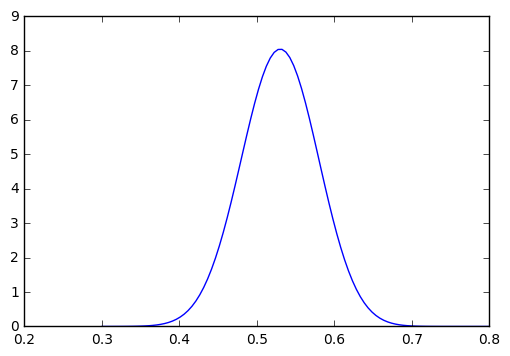

In [16]:
# Ploting binomial distribution with success probability p with h times of success.
def get_p_binomial(p, h, t):
    return factorial(h + t + 1) / (factorial(h) * factorial(t)) * np.power(p, h) * np.power(1 - p, t)

def get_deri_binomial(p, h, t):
    return factorial(h + t + 1) / (factorial(h) * factorial(t)) * (h/p - t/(1-p)) * (np.power(p, h) * np.power(1-p, t))
# plot
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

x = np.linspace(0.3, 0.8, 100)
y = [get_p_binomial(p, 53, 47) for p in x]
#d = [get_deri_binomial(p, 53, 47) for p in x]
plt.plot(x, y);
#plt.plot(x, d);
plt.show()

0.5보다 조금 큰 어딘가? 에서 가장 확률값이 높은 것을 알 수 있다.

$f(p ~ | ~ H=53, T=47)$가 최대가 되는 $p$값을 찾아보면
$$\begin{align}\frac{d f(p ~ | ~ H=53, T=47)}{dp} &= \frac{(h + t + 1)!}{h! t!} \left(\frac{53}{p} - \frac{47}{1-p} \right) p^{53} (1-p)^{47} \\
&= 0 ~ ~ if p=0.53
\end{align}$$

> - 참고: https://en.wikipedia.org/wiki/Checking_whether_a_coin_is_fair

<u>Some problems with picking the parameters that are most likely to generate the data</u>

그런데 앞서 Frequentist적 접근 방법은 trial을 무한번 반복할 수 있다는 가정이 내포되어 있다. 즉 trial 수가 지나치게 낮게 제한된다면 정확한 확률을 구할 수 없다. 예를들어 동전을 한번 던저 앞면이 나왔다고 해서 $p=1$이라고 할수는 없다는 것이다. 따라서 주어진 데이터를 이용해 어떤 하나의 값을 정답으로 사용하는 것 보다는 정답에 대한 불확실성을 포함한 표현을 사용하는 것이 더 나을 수 있다는 것이다. Bayesian 접근법에서는 불확실성을 포함하는 표현으로 모수($p$)에 대한 posterior distribution을 사용한다.

<u>Using a distribution over parameter values</u>

아래 코드에서 h와 t를 증가시켜보면 사후 분포가 점차 볼록한 곡선으로 바뀜을 관찰할 수 있는데... 각각 $t+1$ 번째 trial의 likelihood function에 $t$번째 trial까지의 posterior distribution을 $t+1$번째 trial의 prior distribution으로 사용하여 둘을 곱한 형태가 $t+1$번째 trial의 posterior distribution으로 나오고 있다.

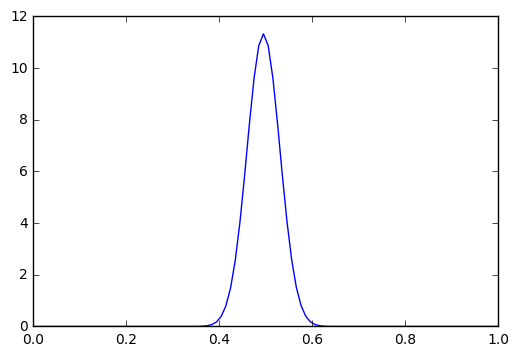

h:99, t:101


In [5]:
# Ploting binomial distribution with success probability p with h times of success.
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
from scipy.misc import comb

def get_p_binomial(p, h, t):
    return factorial(h + t + 1) / (factorial(h) * factorial(t)) * np.power(p, h) * np.power(1 - p, t)

def get_p_likelihood(p, h, t):
    return comb(h+t, h) * (np.power(p, h) * np.power(1-p, t))

h = 99
t = 101
x = np.linspace(0, 1, 100)
y = [get_p_binomial(p, h, t) for p in x]
#d = [get_deri_binomial(p, 53, 47) for p in x]
plt.plot(x, y);
#plt.plot(x, d);
plt.show()
print('h:{}, t:{}'.format(h, t))

.

### Lecture 9e, The Bayesian interpretation of weight decay

weight penalty에 대한 Bayesian 관점에서 살펴보자. 사실 pure Bayesian 접근법을 사용한다면 모든 parameter에 대한 posterior distribution을 구해야 하겠으나, 단순히 prior distribution(belief)과 given data에 최적으로 맞는 한쌍의 parameter를 구할수도 있을 것이다. 이렇게 전체 분포가 아니라 가장 높은 Posterior probability를 갖는 한쌍의 parameter를 찾는 방법을 **Maximum A Posteriori** estimation이라 한다.(줄여서 MAP라 함)      
model capacity를 control하기 위해 weight decay를 사용하는데, 이 과정을 Bayesian 접근법, 특히 MAP를 통해 살펴보면 실제 어떤 일들이 일어나는지 이해하기 쉬워진다.

<u>Supervised Maximum Likelihood Learning</u>

*squared error(redidual)의 합을 최소로 하는 weight vector를 구하는 것은 결국 log probability density를 최대로 하는 weight vector를 구하는 것과 같다?*      
이게 무슨 의미인지 살펴보자.   
(이 논의에서는 network의 output이 $y_c$일때, correct answer $t$는 $y_c$에 noise $\epsilon \sim N(0, \sigma^2)$를 더한 값이라 가정한다.)

아래 그림과 같이 network가 $y$라고 예측했을 때, 정답은 $y$에서 조금 혹은 많이 떨어진 어떤 값 $t$라는 것이다.

<img  src=".\_images\09_normal.PNG"/>

즉 $y_c$가 주어졌을 때 $t_c$의 확률분포는 아래와 같이 평균이 $y_c$이고 분산이 $\sigma^2$인 정규 분포가 된다.

$$p(t_c | y_c) = \frac{1}{\sqrt{2 \pi}\sigma} e^{- \frac{(t_c - y_c)^2}{2 \sigma^2}}$$

여기에 $-log$를 취하면 아래와 같은데, log 함수는 단조증가(monotonically increasing)하므로 위 식을 최대화 하는 $W$를 구하는 것과 아래 식을 최소화 하는 $W$를 구하는 것은 결국 같다.

$$\begin{align}
-log~p(t_c | y_c) &= k + \frac{(t_c - y_c)^2}{2 \sigma^2} \\
k &= -log \left( \frac{1}{\sqrt{2 \pi}\sigma}\right)
\end{align}$$

그런데 위 식을 보면 결국 $\frac{(t_c - y_c)^2}{2 \sigma^2}$를 최소화 하는 것인데 이는 squared error이다. 
즉 **squared error(redidual)의 합을 최소로 하는 weight vector를 구하는 것은 결국 log probability density를 최대로 하는 weight vector를 구하는 것과 같다**

<u>Why we maximize sums of log probabilities</u>, $p(D|W)$

weight vector $W$가 주어졌을 때, 어떤 데이터가 나올 확률을 구해보자. $c$번째 sample이 나올 확률은 p(t_c | W)이고, 각 sample이 독립일 때 전체 sample data가 나올 확률은 아래와 같다. 
$$p(D|W) = \prod_c p(t_c | W) = \prod_c p(t_c | f(input_c, W))$$

그런데 $c$개의 확률을 곱하게 되므로 연산 속도와 소수점 이하의 값들이 사라지는 문제 때문에 아래와 같이 log를 취한 값을 최대화 하는 것이 더 효과적이다.($\because$ log 함수는 monotonic)

$$log ~ p(D|W) = \sum_c log ~ p(t_c | W)$$

<u>MAP: Maximum a Posteriori</u>

실제 model을 학습하는 과정은 weight vector $W$를 구하는 과정인데, Bayesian 접근법으로 data $D$가 주어졌을 때 $W$의 확률 분포를 구한다면 아래와 같다. 

<img  src=".\_images\09_map.PNG"/>

<u>The log probability of a weight under its prior</u>, $p(W)$

그런데 sum of squared weight을 최소화 하는 것은       
$W$의 prior distribution이 $N(0, \sigma^2)$일때          
$-log~p(W)$를 최소화 하는 것과 같다.

$$\begin{align} p(w) &= \frac{1}{\sqrt{2 \pi}\sigma} e^{- \frac{w^2}{2 \sigma_W^2}} \\
-log ~ p(w) &= \frac{w^2}{2 \sigma^2_W} + k
\end{align}$$

.

<u>The Bayesian interpretation of weight decay</u>

이제 앞서 구한 블록들을 조합해 보면 아래와 같은데...

<img  src=".\_images\09_bayesian_weight_decay.PNG"/>

첫번째 term인 $-log ~ p(D ~ | ~ W)$을 최소화 하는 것은 결국 cost function $E$를 최소화 하는 것이고,     
두번째 term인 $-log ~ p(W)$를 최소화 하는 것은 결국 L2 weight penalty(sum of squared weight)를 최소화 하는 것과 같다.

위 식은 Lecture 9b 에서 등장했던 아래 식과 유사한데..
$$C = E + \frac{\lambda}{2} \sum_i w_i^2$$

결국 $\frac{\lambda}{2}$이 $\sigma_D^2 / \sigma_W^2$와 같은 의미를 갖는다는 것이다. (이는 data 분산과 weight의 분산의 비 이다.) 

이런 아이디어를 이용한 방법이 다음에 등장한 <u>MacKay's quick and dirty method</u>이다.

### Lecture 9f, MacKay's quick and dirty method of setting weights costs

1990년대에 영국의 물리학자이자 수학자인 David Mackay(22 April 1967 – 14 April 2016)가 고안한 방법으로 weight penalty가 $\sigma_D^2$(tightness of the prior distribution over weights)의 역수에 비례한다는 사실을 이용하여 경험적으로(empirically) weight penalty와 distribution of noise를 찾을 수 있다는 것이다. (즉 validation set 없이 weight penalty를 결정할 수 있게 해 준다.)     
이 방법을 통해 validation set없이도 network의 weight group 마다 다른 weight penalty를 사용할 수 있다.

<u>Estimating the variance of the output noise</u>

앞서 아래 내용을 배웠었는데, 

<img  src=".\_images\09_bayesian_weight_decay.PNG"/>

$-log~p(D~|~W) \propto \frac{1}{2 \sigma_D^2} \sum_C (y_c - t_c^2)$ 라는 점에서 아이디어를 얻어,      
residual error, ($y_c - t_c$)의 분산을 output variance, $\sigma_D^2$로 사용한다.

<u>Estimating the variance of the Gaussian prior on the weights</u>

$-~log~p(W)$를 근사하기 위해서는 $\sigma_W^2$를 정해야하는데,    
MacKay의 방법에서는 처음에는 대략 적당한 variance of prior를 사용하고,     
학습을 진행한 후 나온 weight들의 분산을 바로 variance of prior로 사용한다.    
이 방법의 좋은 점은 weight들을 그룹지어서 각 그룹마다 다른 variance of prior를 사용할 수 있다는 것이다.(결국 각 그룹마다 다른 weight penalty를 사용하는 것과 같음)     
말도 안되는 아이디어 같지만 예측 성능이 좋다고 한다..

<u>MacKay's quick and dirty method of choosing the ratio of the noise variance to the weight prior variance</u>

전체 방법을 정리해보면...

우선 noise variance와 weight prior variance로 그냥 적당한 값을 정해 시작한다.

1. 앞서 정한 $\sigma_D$와 $\sigma_W$의 ratio를 이용하여 weight penalty를 정한다.
2. 학습이 조금 진행된 후 noise variance($\sigma_D$)를 variance of the residual error로 대체
3. 학습된 weight(grouped)들의 variance로 $\sigma_W$를 대체
4. 학습을 좀더 진행하고 다시 1로 돌아간다.(반복)